In [33]:
import SimpleITK as sitk


def binarystore(filename='bi.pkl', content=None, model='wb'):
    
    import pickle
    # 创建一个二进制文件
    pick_file = open(filename, model)

    # 使用pickle的函数dump装入文件
    pickle.dump(content, pick_file)

    # 关闭打开的文件完成写入
    pick_file.close()


def binaryread(filename='bi.pkl', model='rb'):
    import pickle
    pickfile = open(filename, model)

    # 读取文件内容到列表，怎么写入的怎么读取
    results = pickle.load(pickfile)
    pickfile.close()
    return results
    


In [14]:
id_series, data_path, rep_num, complete_maskfiles, all_3D = binaryread('list_combine_test.pkl')
print(all_3D[0])

(<SimpleITK.SimpleITK.Image; proxy of <Swig Object of type 'std::vector< itk::simple::Image >::value_type *' at 0x7fe07c057870> >, './100003_nii_test/0324/0324_Flair.nii.gz')


# 将3D医学图像读取并获取numpy数据

In [34]:
def imgred(filename="./taop-2021/100003/0001/0001_Flair/0.dcm", idx = None, detail=True):
    """
    filename: 图像文件
    idx: 如果指定，则展示给定切片的信息
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    if isinstance(filename, str):
        file = sitk.ReadImage(filename)
    else:
        file = filename
    
    pixel_array = sitk.GetArrayFromImage(file)
    if detail:
        print(file.GetSize())
        print(file.GetOrigin())
        print(file.GetSpacing())
        print(file.GetDirection())
        print(file.GetMetaDataKeys())
        for key in file.GetMetaDataKeys():
            print(key, ' : ', file.GetMetaData(key))
        
        if idx == None:
            idx = 0
        print(pixel_array.shape, '\n', pixel_array[idx, 100:110, 100:110])
        plt.figure(figsize=(9,9))
        plt.imshow(pixel_array[idx], cmap='gray')
        plt.axis('on') # 关掉坐标轴为 off
        plt.title('image') # 图像题目
        plt.show()
    return pixel_array

(210, 258, 20)
(0.0, 0.0, 0.0)
(0.850000023841857, 0.850000023841857, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
()
(20, 258, 210) 
 [[650 648 614 577 559 511 474 463 457 475]
 [625 631 597 548 517 499 465 467 467 469]
 [586 568 538 506 479 452 441 445 446 455]
 [539 510 493 466 440 421 407 421 449 459]
 [500 473 460 434 414 407 400 406 444 473]
 [484 454 435 425 423 421 411 406 421 439]
 [463 446 443 415 419 429 408 417 432 429]
 [481 446 426 409 406 419 429 425 411 421]
 [481 467 432 423 437 421 415 417 408 414]
 [510 465 427 436 445 425 413 424 413 386]]


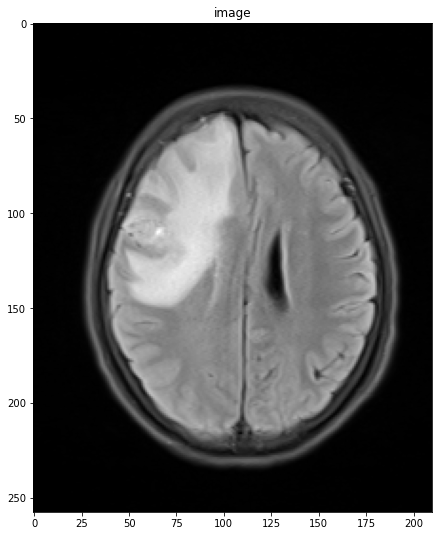

(210, 258, 20)
(0.0, 0.0, 0.0)
(0.8500000238418579, 0.8500000238418579, 1.0)
(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)
('ITK_FileNotes', 'ITK_original_direction', 'ITK_original_spacing', 'aux_file', 'bitpix', 'cal_max', 'cal_min', 'datatype', 'descrip', 'dim[0]', 'dim[1]', 'dim[2]', 'dim[3]', 'dim[4]', 'dim[5]', 'dim[6]', 'dim[7]', 'dim_info', 'intent_code', 'intent_name', 'intent_p1', 'intent_p2', 'intent_p3', 'nifti_type', 'pixdim[0]', 'pixdim[1]', 'pixdim[2]', 'pixdim[3]', 'pixdim[4]', 'pixdim[5]', 'pixdim[6]', 'pixdim[7]', 'qform_code', 'qform_code_name', 'qoffset_x', 'qoffset_y', 'qoffset_z', 'quatern_b', 'quatern_c', 'quatern_d', 'scl_inter', 'scl_slope', 'sform_code', 'sform_code_name', 'slice_code', 'slice_duration', 'slice_end', 'slice_start', 'srow_x', 'srow_y', 'srow_z', 'toffset', 'vox_offset', 'xyzt_units')
ITK_FileNotes  :  
ITK_original_direction  :  [UNKNOWN_PRINT_CHARACTERISTICS]

ITK_original_spacing  :  [UNKNOWN_PRINT_CHARACTERISTICS]

aux_file  :  
bitpix  :  16

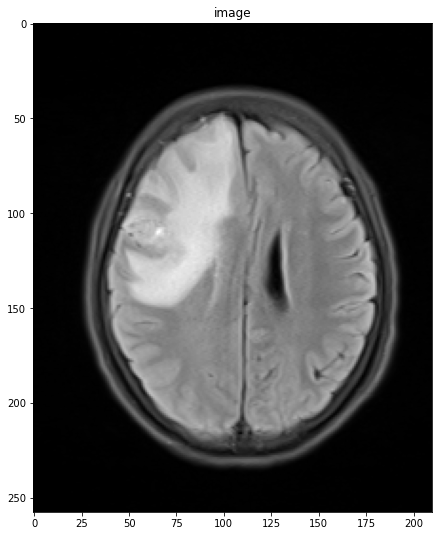

True


In [37]:
import numpy as np
# 无元数据
test1 = imgred(all_3D[0][0], idx=13)
# 有元数据
test2 = imgred(all_3D[0][1], idx=13)
print(np.all(test1==test2))